In [1]:
import numexpr
print(numexpr.__version__)  # Should be 2.8.4 or newer

!pip install --upgrade s3fs 

2.7.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 144.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.5.1
    Uninstalling fsspec-2025.5.1:
      Successfully uninstalled fsspec-2025.5.1
  Attempting uninstall: botocore━━━━━━━━━━━━━━━━ 0/5 [fsspec]
    Found existing installation: botocore 1.38.380/5 [fsspec]
    Uninstalling botocore-1.38.38:━━━━━━━━━━━━━━━━━━━━━━━ 2/5 [botocore]
      Successfully uninstalled botocore-1.38.38━━━━━━━━━━━━━━━ 2/5 [botocore]
  Attempting uninstall: s3fs╺━━━━━━━━━━━━━━━━━━━━━━━ 2/5 [botocore]
    Found existing installation: s3fs 0.4.2━━━━━━━━━━━━━━━━━━━ 2/5 [botocore]
    Uninstalling s3fs-0.4.2:m╺━━━━━━━━━━━━━━━━━━━━━━━ 2/5 [botocore]
      Successfully uninstalled s3fs-0.4.2━━━━━━━━━━━━━━━━━━━━━ 2/5 [botocore]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [s3fs]2/5 [botocore]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beha

In [2]:
import pandas as pd

bucket = 'businessanalyticsassesmnet'
data_key = 'car_prices.csv'  # Make sure this is just the file name or full correct key
data_location = f's3://{bucket}/{data_key}'

# Then read
df = pd.read_csv(data_location)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import datasets
from sklearn import neighbors
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
df = df.drop_duplicates()
df = df.dropna()
df.shape

(472325, 16)

In [ ]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


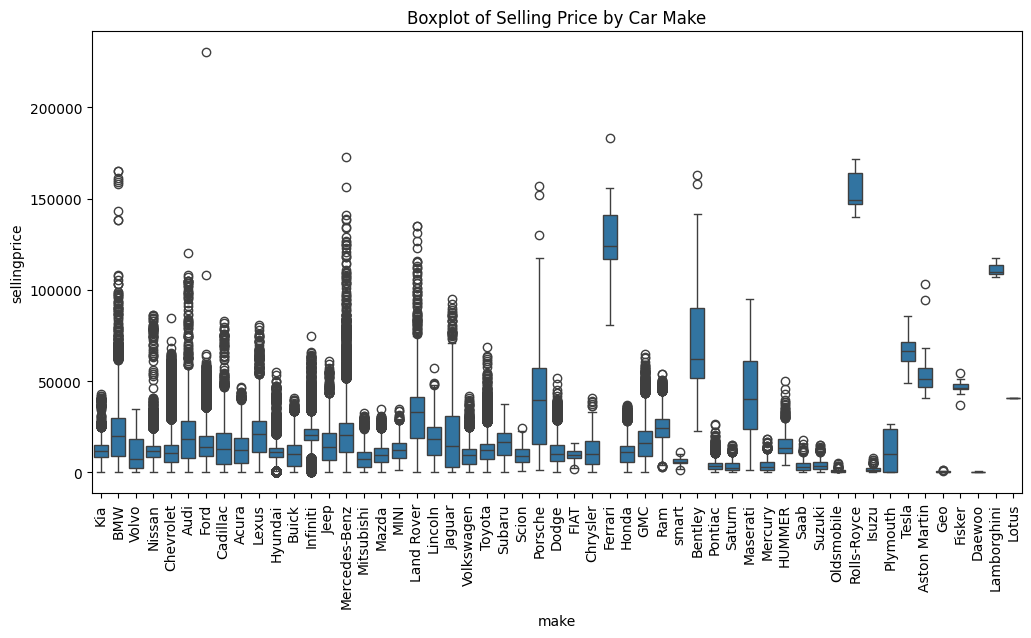

In [ ]:

# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="make", y="sellingprice")
plt.xticks(rotation=90)
plt.title("Boxplot of Selling Price by Car Make")
plt.show()

In [ ]:
# Drop rows with missing values in key numerical columns
df = df.dropna(subset=["sellingprice", "odometer", "mmr"])

# -----------------------------
# Function to remove outliers using IQR
# -----------------------------
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# -----------------------------
# Apply to multiple columns
# -----------------------------
columns_to_clean = ["sellingprice", "odometer", "mmr"]

df_cleaned = df.copy()
for col in columns_to_clean:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# -----------------------------
# Summary
# -----------------------------
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

# Save to new CSV (optional)
# df_cleaned.to_csv("car_prices_no_outliers.csv", index=False)



Original shape: (472325, 16)
Shape after removing outliers: (445982, 16)


In [ ]:
df_cleaned.shape

(445982, 16)

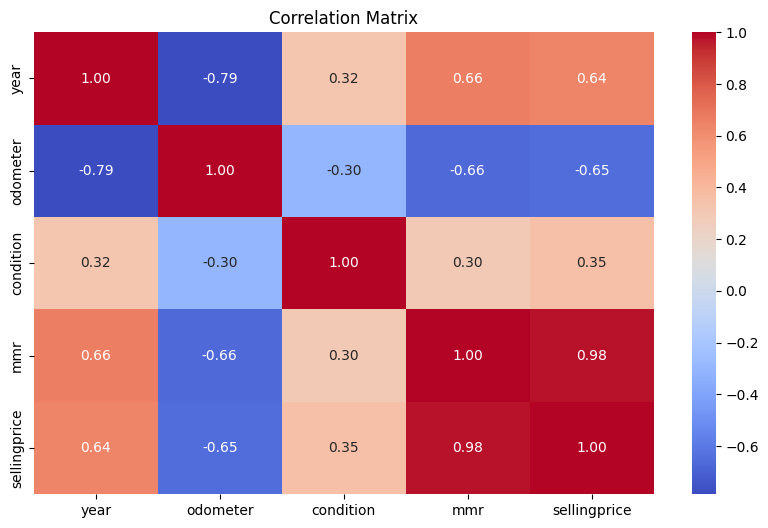

In [ ]:
# Correlation Matrix
# -------------------------------
numeric_cols = ["year", "odometer", "condition", "mmr", "sellingprice"]
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


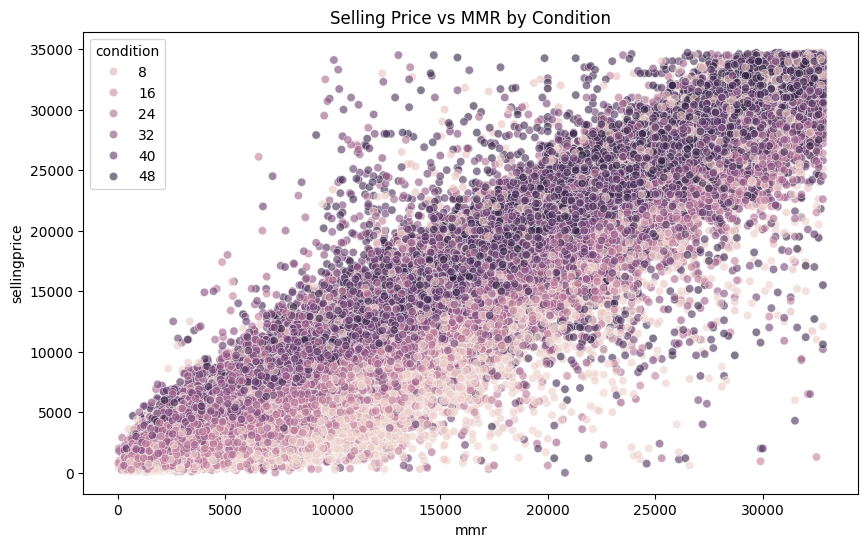

In [ ]:
# Scatter Plots
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="mmr", y="sellingprice", hue="condition", alpha=0.6)
plt.title("Selling Price vs MMR by Condition")
plt.show()


In [ ]:
# Define allowed body types
body_types = ['suv', 'sedan', 'convertible', 'coupe', 'crew cab', 'van', 'wagon']

# Convert to lowercase for consistency (optional)
df_cleaned['body'] = df_cleaned['body'].str.lower()

# Filter dataset
df_filtered = df_cleaned[df_cleaned['body'].isin(body_types)]

# Check result
print(df_filtered['body'].value_counts())

body
sedan          203852
suv            111382
coupe           14249
wagon           13970
crew cab        11575
convertible      8145
van              3155
Name: count, dtype: int64


In [ ]:
df_filtered.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)


In [ ]:
variables_in_study = df_filtered[['year', 'odometer','condition','mmr','sellingprice']]

scaler = StandardScaler()
scaler.fit(variables_in_study)
X = scaler.transform(variables_in_study)

X = pd.DataFrame(X, columns = ['year', 'odometer','condition','mmr','sellingprice'])
independent_variables = X[['year', 'odometer','condition','mmr']]
dependent_variable = X['sellingprice']

In [ ]:
variables_in_study.head()

,year,odometer,condition,mmr,sellingprice
0,2015,16639.0,5.0,20500.0,21500.0
1,2015,9393.0,5.0,20800.0,21500.0
2,2014,1331.0,45.0,31900.0,30000.0
3,2015,14282.0,41.0,27500.0,27750.0
5,2015,5554.0,1.0,15350.0,10900.0


In [ ]:
independent_variables.head()

,year,odometer,condition,mmr
0,1.284904,-1.079214,-1.979262,1.070435
1,1.284904,-1.237933,-1.979262,1.111758
2,1.019278,-1.414526,1.087928,2.640732
3,1.284904,-1.130843,0.781209,2.034653
4,1.284904,-1.322024,-2.285981,0.361046


In [ ]:
# @title Default title text
dependent_variable.head()

,sellingprice
0,1.209815
1,1.209815
2,2.362391
3,2.057297
4,-0.227515


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2)

In [ ]:
print('df_filtered shape is: ', df_filtered.shape)
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

df_filtered shape is:  (366328, 16)
x_train shape is:  (293062, 4)
x_test shape is:  (73266, 4)
y_train shape is:  (293062,)
y_test shape is:  (73266,)


In [ ]:
MAE_list=[]
MSE_list=[]
RMSE_list=[]
R_Squared_list=[]


def model_evaluation(y_test, predictions):
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(y_test,predictions)

    MAE_list.append(mae)
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    R_Squared_list.append(r2)

    print("Results of sklearn.metrics: \n")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

In [ ]:
regression_model = sm.OLS(y_train, x_train)
results = regression_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           sellingprice   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                          1.726e+06
Date:                Sun, 20 Jul 2025   Prob (F-statistic):                        0.00
Time:                        21:47:52   Log-Likelihood:                          53029.
No. Observations:              293062   AIC:                                 -1.061e+05
Df Residuals:                  293058   BIC:                                 -1.060e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year          -0.0234      0.001    -36.721      0.000      -0.025      -0.022
odometer      -0.0098      0.001    -15.343      0.000      -0.011      -0.009
condition      0.0702      0.000    175.942      0.000       0.069       0.071
mmr            0.9645      0.001   1837.447      0.000       0.963       0.966
==============================================================================
Omnibus:                   102219.585   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4312184.258
Skew:                          -0.970   Prob(JB):                         0.00
Kurtosis:                      21.692   Cond. No.                         3.50
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
  print(results.rsquared)
print(results.rsquared_adj)
print(results.pvalues)
print(results.params)

0.9592900527149344
0.9592894970577296
year         1.575519e-294
odometer      4.125786e-53
condition     0.000000e+00
mmr           0.000000e+00
dtype: float64
year        -0.023448
odometer    -0.009761
condition    0.070174
mmr          0.964487
dtype: float64


In [ ]:
predictions = results.predict(x_test)

In [ ]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.13326411774001273
MSE: 0.0403383563008526
RMSE: 0.2008441094502216
R-Squared: 0.9594164760031624


In [ ]:
poly_reg = PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly,y_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

LinearRegression()

In [ ]:
predictions = lin_reg.predict(poly_reg.fit_transform(x_test))

In [ ]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.12799926428410016
MSE: 0.03813809385793317
RMSE: 0.1952897689535557
R-Squared: 0.961630111159379


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

In [ ]:

model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.17630400938837862
MSE: 0.06620412563155537
RMSE: 0.2573016238416605
R-Squared: 0.9333935001907578


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

for depth in [3, 5, 10]:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(x_train, y_train)
    preds = dt.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    print(f"DecisionTreeRegressor (max_depth={depth}) - MSE: {mse}")


DecisionTreeRegressor (max_depth=3) - MSE: 0.06547803995587667
DecisionTreeRegressor (max_depth=5) - MSE: 0.04409788249030611
DecisionTreeRegressor (max_depth=10) - MSE: 0.03418891011499902


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df_filtered, independent_variables, and dependent_variable are defined in previous cells.
# If not, you'll need to re-run the data loading and preprocessing steps.

# Re-defining variables if the runtime was reset
if 'df_filtered' not in locals():
    # This section assumes the data loading and preprocessing steps are in the notebook
    # and need to be re-executed to define df_filtered, independent_variables, and dependent_variable.
    # You might need to manually run the preceding cells if they are not automatically executed.
    print("Please re-run the preceding cells to define df_filtered, independent_variables, and dependent_variable.")
else:
    # Assuming independent_variables and dependent_variable are already created from df_filtered
    # Re-split the data
    x_train, x_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2, random_state=42) # Added random_state for reproducibility

    rfr = RandomForestRegressor()
    rfr.fit(x_train, y_train)
    predictions = rfr.predict(x_test)

In [ ]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.1281674318060991
MSE: 0.03635027002944177
RMSE: 0.19065746780402223
R-Squared: 0.9636890096657782


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

for k in [3, 5, 10]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    preds = knn.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    print(f"KNeighborsRegressor (n_neighbors={k}) - MSE: {mse}")


KNeighborsRegressor (n_neighbors=3) - MSE: 0.04284208800222585
KNeighborsRegressor (n_neighbors=5) - MSE: 0.03869131765451864
KNeighborsRegressor (n_neighbors=10) - MSE: 0.03577329284327145


In [ ]:
rdg = Ridge(alpha = 0.5)
rdg = rdg.fit(x_train, y_train)
predictions = rdg.predict(x_test)

In [ ]:
print(rdg.score(x_train, y_train))
print(rdg.coef_)
print(rdg.intercept_)

0.9594576455141806
[-0.02337973 -0.00948183  0.07014261  0.96499777]
0.0001462522603959989


In [ ]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.13368013219816152
MSE: 0.041299519339203214
RMSE: 0.20322283173699557
R-Squared: 0.958745108459464


In [ ]:
lasso = Lasso(alpha=0.01)
lasso = lasso.fit(x_train, y_train)
prediction = lasso.predict(x_test)

In [ ]:
print(lasso.score(x_train, y_train))
print(lasso.coef_)
print(lasso.intercept_)

0.9591051444365046
[-0.         -0.          0.0603485   0.94887707]
0.00014356199149366126


In [ ]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.13368013219816152
MSE: 0.041299519339203214
RMSE: 0.20322283173699557
R-Squared: 0.958745108459464


In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(x_train, y_train)
predictions = fit.predict(x_test)

In [ ]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.1408485548428966
MSE: 0.04284208800222585
RMSE: 0.20698330367985204
R-Squared: 0.9572042066788853


In [ ]:
models_list = ['Multiple Linear Regression', 'Polynomial Regression', 'Decision Tree Regression','Random Forest Regression', 'Ridge Regression', 'Lasso Regression', 'KNN Regression' ]
#models_list = ['Multiple Linear Regression', 'Polynomial Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Ridge Regression', 'Lasso Regression', 'KNN Regression' ]

models_list

['Multiple Linear Regression',
 'Polynomial Regression',
 'Decision Tree Regression',
 'Random Forest Regression',
 'Ridge Regression',
 'Lasso Regression',
 'KNN Regression']

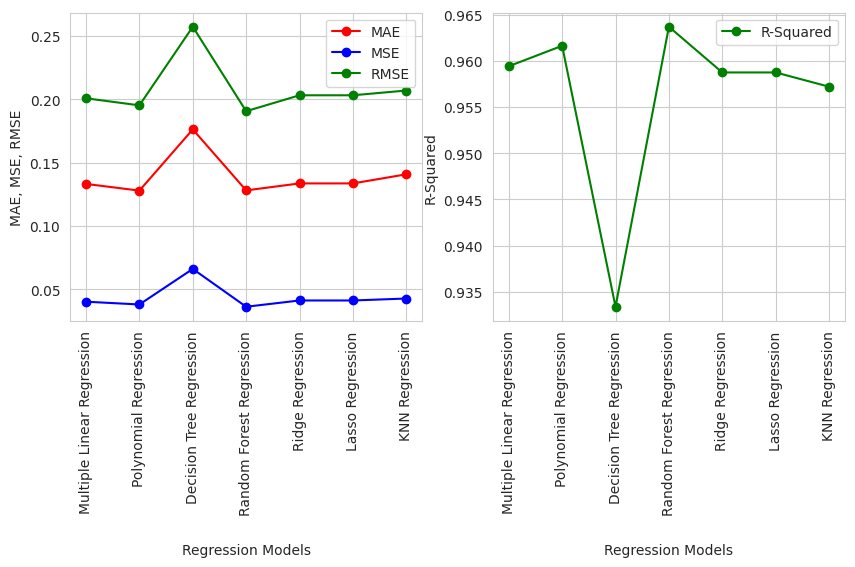

In [ ]:
sns.set_style('whitegrid')

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4));
ax1.plot(MAE_list,color='red', label='MAE', marker="o")
ax1.plot(MSE_list, color='blue', label='MSE', marker="o")
ax1.plot(RMSE_list,color='green', label='RMSE', marker="o")
ax2.plot(R_Squared_list,  color='green', label='R-Squared', marker="o")
ax1.legend()
ax2.legend()
ax1.set_xticks(ticks=range(len(MAE_list)))
ax2.set_xticks(ticks=range(len(R_Squared_list)))
ax1.set_xticklabels(models_list, rotation=90)
ax2.set_xticklabels(models_list, rotation=90)
ax1.set_xlabel('Regression Models', labelpad=20)
ax2.set_xlabel('Regression Models', labelpad=20)
ax1.set_ylabel('MAE, MSE, RMSE')
ax2.set_ylabel('R-Squared')
plt.show()

# for index, value in enumerate(accuracy_score_list):
#     plt.text(index, value+0.020, "%.3f" %value, ha="center")

In [ ]:
print(np.min(RMSE_list))
print(np.argmin(RMSE_list))
print(models_list[np.argmin(RMSE_list)])

0.19065746780402223
3
Random Forest Regression


In [ ]:
print(np.max(R_Squared_list))
print(np.argmax(R_Squared_list))
print(models_list[np.argmax(R_Squared_list)])

0.9636890096657782
3
Random Forest Regression


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model (use any n_estimators)
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

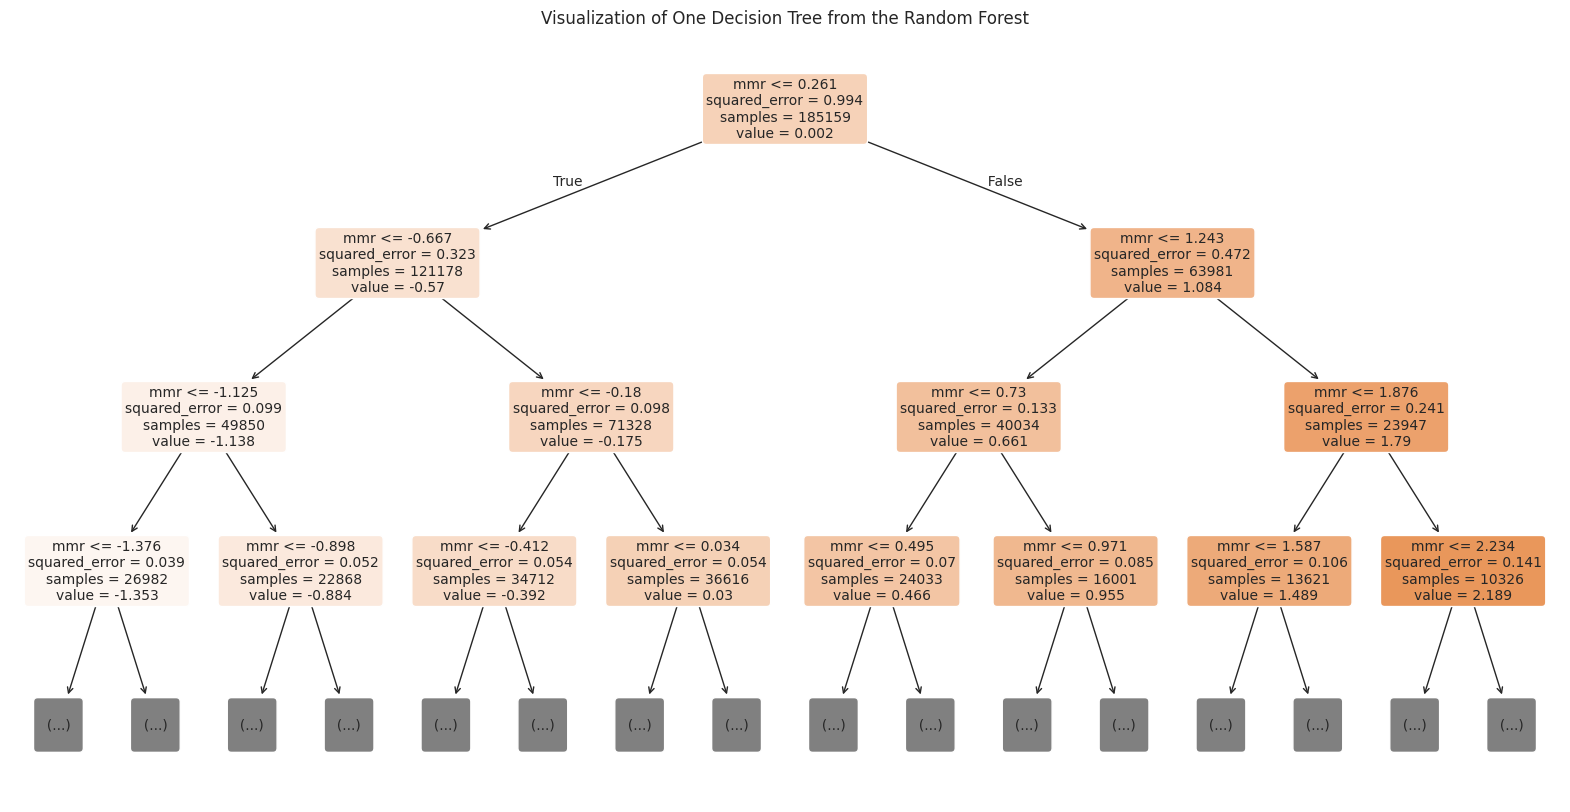

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(rfr.estimators_[0],
          feature_names=x_train.columns,
          filled=True,
          rounded=True,
          max_depth=3,     # Only show up to 3 levels to keep it readable
          fontsize=10)
plt.title("Visualization of One Decision Tree from the Random Forest")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Store results
evaluation_results = {}

# 1. RandomForestRegressor with different n_estimators
for n in [10, 50, 100]:
    rfr = RandomForestRegressor(n_estimators=n, random_state=42)
    rfr.fit(x_train, y_train)
    preds = rfr.predict(x_test)
    evaluation_results[f'RandomForest_n={n}'] = {
        'MAE': mean_absolute_error(y_test, preds),
        'R2': r2_score(y_test, preds)
    }

# 2. GradientBoostingRegressor with different learning rates
for lr in [0.01, 0.1, 0.2]:
    gbr = GradientBoostingRegressor(learning_rate=lr, random_state=42)
    gbr.fit(x_train, y_train)
    preds = gbr.predict(x_test)
    evaluation_results[f'GradientBoost_lr={lr}'] = {
        'MAE': mean_absolute_error(y_test, preds),
        'R2': r2_score(y_test, preds)
    }

# 3. LinearRegression with different fit_intercept values
for intercept in [True, False, True]:  # repeated True for format
    lr = LinearRegression(fit_intercept=intercept)
    lr.fit(x_train, y_train)
    preds = lr.predict(x_test)
    evaluation_results[f'LinearReg_intercept={intercept}'] = {
        'MAE': mean_absolute_error(y_test, preds),
        'R2': r2_score(y_test, preds)
    }

# Print results
for model_name, model_metrics in evaluation_results.items():
    print(f"{model_name}: MAE = {model_metrics['MAE']:.3f}, R² = {model_metrics['R2']:.3f}")

RandomForest_n=10: MAE = 0.134, R² = 0.961
RandomForest_n=50: MAE = 0.129, R² = 0.963
RandomForest_n=100: MAE = 0.128, R² = 0.964
GradientBoost_lr=0.01: MAE = 0.331, R² = 0.820
GradientBoost_lr=0.1: MAE = 0.120, R² = 0.967
GradientBoost_lr=0.2: MAE = 0.119, R² = 0.968
LinearReg_intercept=True: MAE = 0.134, R² = 0.959
LinearReg_intercept=False: MAE = 0.134, R² = 0.959


# Cluster Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
clustering = KMeans(n_clusters=3, random_state=5, n_init='auto')
model = clustering.fit(X)

# plot the clusters

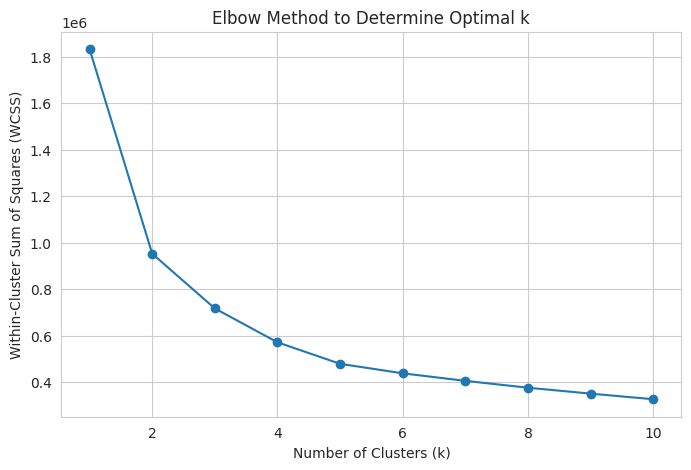

In [ ]:
# Elbow method
wcss = []  # Within-cluster sum of squares

K_range = range(1, 11)  # Try k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# time series analysis

### SES Simple exponential Smoothing

/tmp/ipython-input-54-2390325021.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')
/tmp/ipython-input-54-2390325021.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')


Evaluation Metrics:
SES   - MAE: 4035.00, RMSE: 4997.13
Holt  - MAE: 8150.83, RMSE: 9228.75
ARIMA - MAE: 3975.80, RMSE: 4895.76

30-Day Forecast:
2015-03-29    13221.035790
2015-03-30    12739.866171
2015-03-31    13064.083934
2015-04-01    13009.998294
2015-04-02    13051.012392
2015-04-03    13055.170978
2015-04-04    13071.296530
2015-04-05    13039.655937
2015-04-06    13047.932722
2015-04-07    13042.835632
2015-04-08    13045.469159
2015-04-09    13045.330185
2015-04-10    13047.663333
2015-04-11    13046.451213
2015-04-12    13046.825548
2015-04-13    13046.362559
2015-04-14    13046.427575
2015-04-15    13046.308201
2015-04-16    13046.457085
2015-04-17    13046.423090
2015-04-18    13046.466090
2015-04-19    13046.444417
2015-04-20    13046.449070
2015-04-21    13046.435297
2015-04-22    13046.440620
2015-04-23    13046.437907
2015-04-24    13046.441141
2015-04-25    13046.440549
2015-04-26    13046.441463
2015-04-27    13046.440676
Name: predicted_mean, dtype: float64


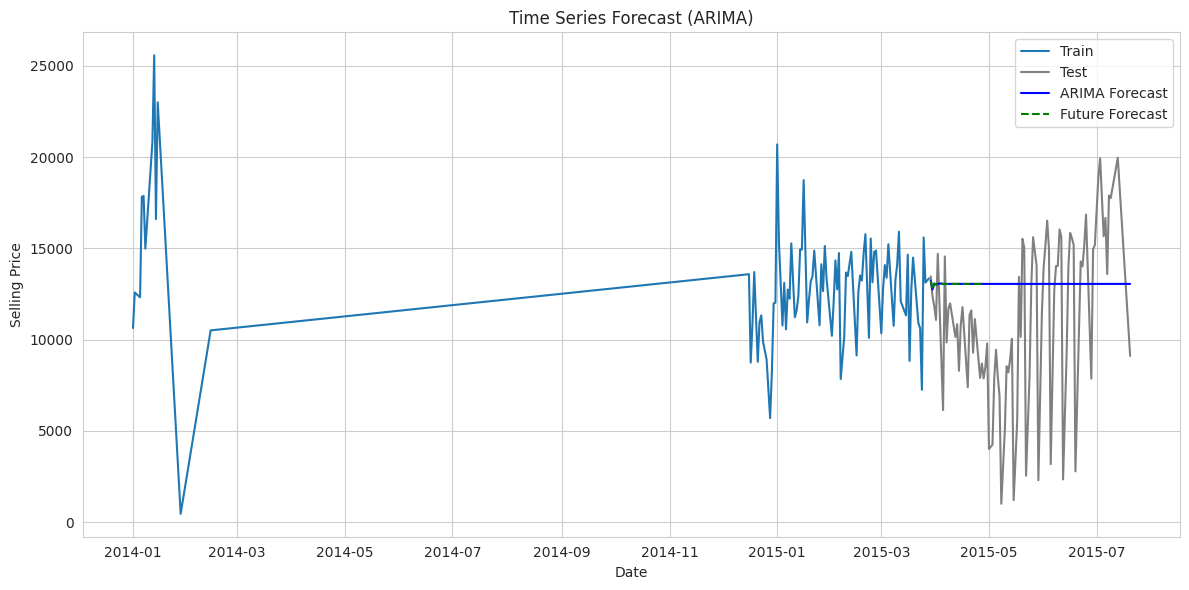

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("car_prices.csv")

# Convert saledate to datetime
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')

# Drop rows with missing sale dates or prices
df = df.dropna(subset=['saledate', 'sellingprice'])

# Set datetime as index and ensure timezone-naive
df.set_index('saledate', inplace=True)
df.index = pd.to_datetime(df.index, utc=True).tz_localize(None)

# Resample to daily average selling price
daily_prices = df['sellingprice'].resample('D').mean()

# Fill missing values using linear interpolation
ts = daily_prices.interpolate()

# Train-test split
split_point = int(len(ts) * 0.8)
train, test = ts[:split_point], ts[split_point:]

# ---- Modeling ----

# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(train).fit()
ses_forecast = ses_model.forecast(len(test))

# Holt’s Linear Trend
holt_model = Holt(train).fit()
holt_forecast = holt_model.forecast(len(test))

# ARIMA (simple (5,1,0) for now)
arima_model = ARIMA(train, order=(5,1,0)).fit()
arima_forecast = arima_model.forecast(len(test))

# ---- Evaluation ----

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

ses_mae, ses_rmse = evaluate(test, ses_forecast)
holt_mae, holt_rmse = evaluate(test, holt_forecast)
arima_mae, arima_rmse = evaluate(test, arima_forecast)

print("Evaluation Metrics:")
print(f"SES   - MAE: {ses_mae:.2f}, RMSE: {ses_rmse:.2f}")
print(f"Holt  - MAE: {holt_mae:.2f}, RMSE: {holt_rmse:.2f}")
print(f"ARIMA - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")

# ---- Forecast Future ----

# Forecast next 30 days with best model (ARIMA)
future_forecast = arima_model.forecast(30)

# Create a copy with formatted date index for printing
formatted_forecast = future_forecast.copy()
formatted_forecast.index = formatted_forecast.index.strftime('%Y-%m-%d')

print("\n30-Day Forecast:")
print(formatted_forecast)

# ---- Plot ----
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='gray')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='blue')
plt.plot(future_forecast.index, future_forecast, label='Future Forecast', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Selling Price')
plt.title('Time Series Forecast (ARIMA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


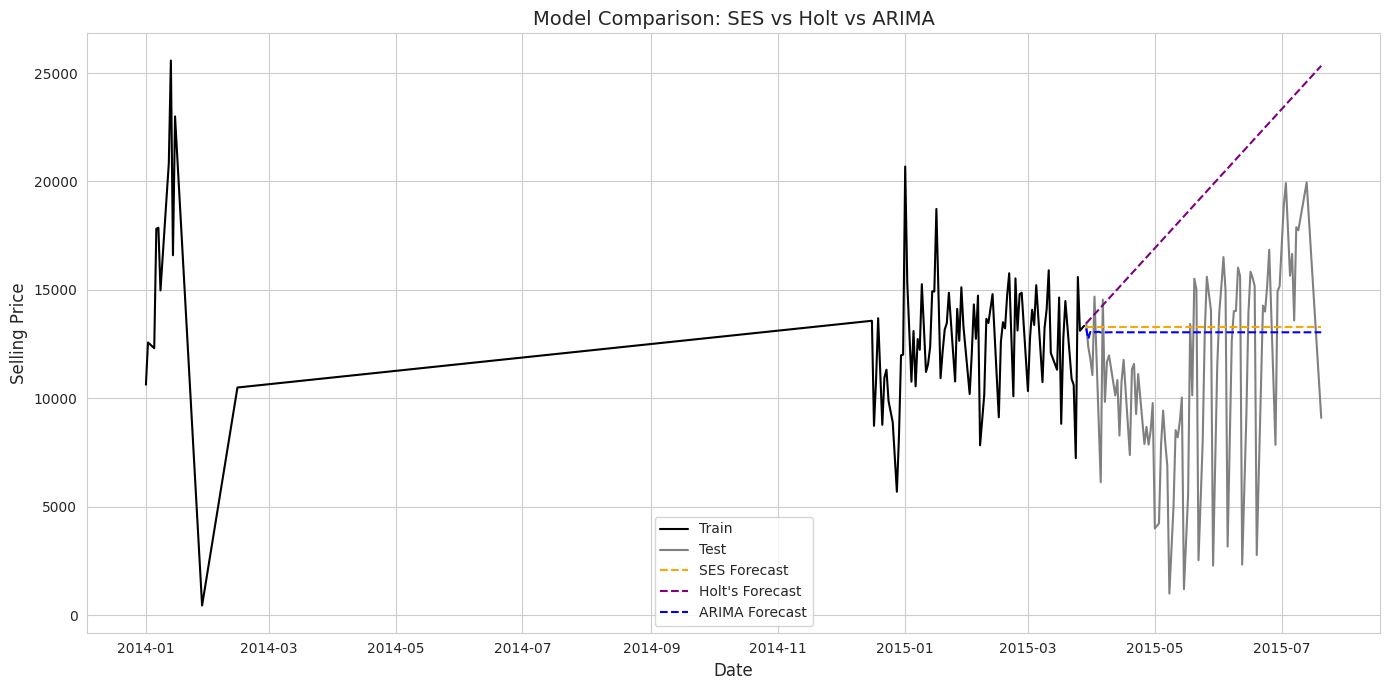

In [ ]:
import matplotlib.pyplot as plt

# Plotting all models' forecasts along with train and test data
plt.figure(figsize=(14, 7))

# Plot training and test sets
plt.plot(train.index, train, label='Train', color='black')
plt.plot(test.index, test, label='Test', color='gray')

# Plot forecasts
plt.plot(test.index, ses_forecast, label='SES Forecast', linestyle='--', color='orange')
plt.plot(test.index, holt_forecast, label="Holt's Forecast", linestyle='--', color='purple')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--', color='blue')

# Labels and styling
plt.title('Model Comparison: SES vs Holt vs ARIMA', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
